In [526]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read Data

In [527]:
data = pd.read_csv("dataset/raw_data.csv")
cluster_y = pd.read_csv("dataset/cluster.csv")
cluster_y = cluster_y['Cluster'] # Ground truth label
data

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


# Data-Processing

In [528]:
col = list(data.columns)
zero_list = []
for i in col:
    n = 0
    for j in data[i].values:
        if j == 0:
            n += 1
    if n == len(data.index):
        zero_list.append(i)
zero_list

['Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'RST.Flag.Count',
 'CWE.Flag.Count',
 'ECE.Flag.Count',
 'Fwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate']

In [529]:
data = data.drop(columns=zero_list)
data

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


In [530]:
col = list(data.columns)
# data[col] = data[col].apply(pd.to_numeric, errors='coerce').fillna(0.0)
# data = pd.get_dummies(data[col])
data = pd.get_dummies(data)
# data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
data = pd.DataFrame(data, dtype='float')
data

,ID,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Timestamp_28/04/201710:21:20,Timestamp_28/04/201710:21:50,Timestamp_28/04/201710:22:11,Timestamp_28/04/201710:22:16,Timestamp_28/04/201710:22:17,Timestamp_28/04/201710:22:18,Timestamp_28/04/201710:22:31,Timestamp_28/04/201710:22:36,Timestamp_28/04/201710:23:51,Label_BENIGN
0,1651.0,39485.0,443.0,6.0,2021337.0,9.0,5.0,795.0,625.0,487.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6460.0,43024.0,443.0,6.0,65552.0,14.0,8.0,373.0,5252.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6578.0,43031.0,443.0,6.0,107032.0,14.0,12.0,373.0,10784.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7219.0,43064.0,443.0,6.0,75351.0,14.0,11.0,373.0,10784.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7683.0,43076.0,443.0,6.0,65862.0,15.0,13.0,373.0,11396.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701.0,59979.0,53.0,17.0,119040676.0,2146.0,2138.0,80152.0,234873.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4313,3572728.0,59979.0,53.0,17.0,31408313.0,647.0,642.0,24421.0,65673.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4314,3573244.0,48859.0,53.0,17.0,76350907.0,4.0,0.0,180.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4315,3573361.0,48859.0,53.0,17.0,13621158.0,4.0,0.0,180.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [531]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

min_max_scaler = MinMaxScaler() #  MinMaxScaler
min_max_scaler = min_max_scaler.fit(data)
data = min_max_scaler.transform(data)
data

array([[0.00000000e+00, 6.47741068e-01, 7.38591840e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34638978e-03, 7.05797434e-01, 7.38591840e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37942658e-03, 7.05912267e-01, 7.38591840e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99949325e-01, 8.01519079e-01, 8.83642608e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99982082e-01, 8.01519079e-01, 8.83642608e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.01519079e-01, 8.83642608e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [532]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # PCA
pca.fit(data)
data = pca.transform(data)
data

array([[-0.35305975,  1.09697422,  0.2520231 ],
       [-0.34875805,  1.26272815,  0.35950586],
       [-0.34433078,  1.31962644,  0.41538211],
       ...,
       [ 0.46690672,  0.36754777, -0.42856077],
       [ 0.07044577,  0.45201023, -0.6387935 ],
       [ 0.64366885,  0.32989192, -0.33483049]])

# K-Means

In [533]:
from sklearn import cluster, datasets, metrics

In [534]:
kmeans_fit = cluster.KMeans(n_clusters = 4, random_state=46).fit(data)
cluster_labels = kmeans_fit.labels_
predict = kmeans_fit.predict(data)

# Measure performance

In [535]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(cluster_y,predict))

Adjusted Mutual Information: 0.737


# Visualize data & Visualize clusters (2D)

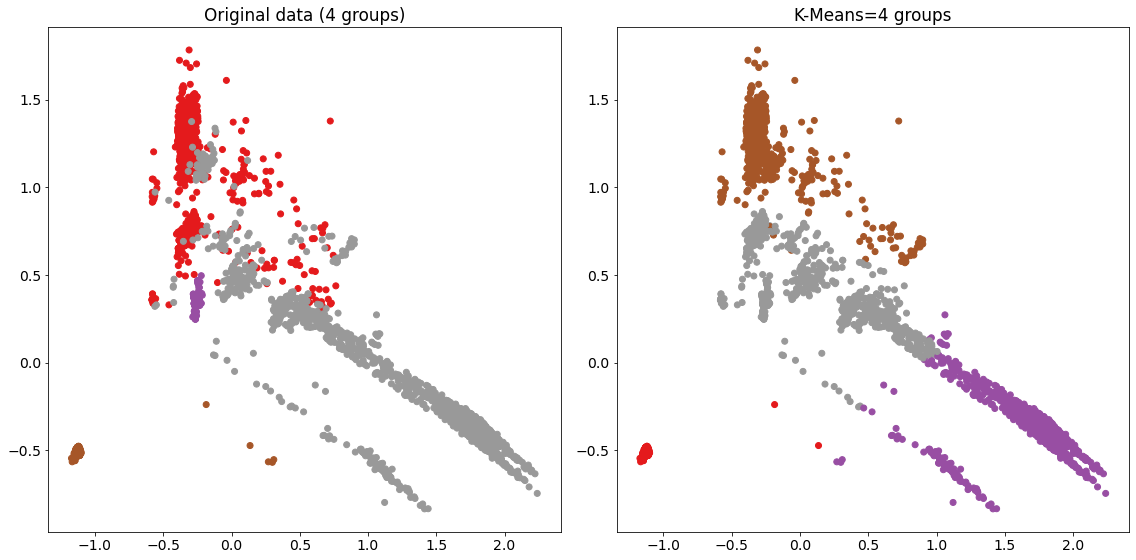

In [536]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Original data (4 groups)')
plt.scatter(data[:,0], data[:,1], c=cluster_y, cmap=plt.cm.Set1)

plt.subplot(122)
plt.title('K-Means=4 groups')
plt.scatter(data[:,0], data[:,1], c=predict, cmap=plt.cm.Set1)

plt.tight_layout()
plt.show()

# Visualize data & Visualize clusters (3D)

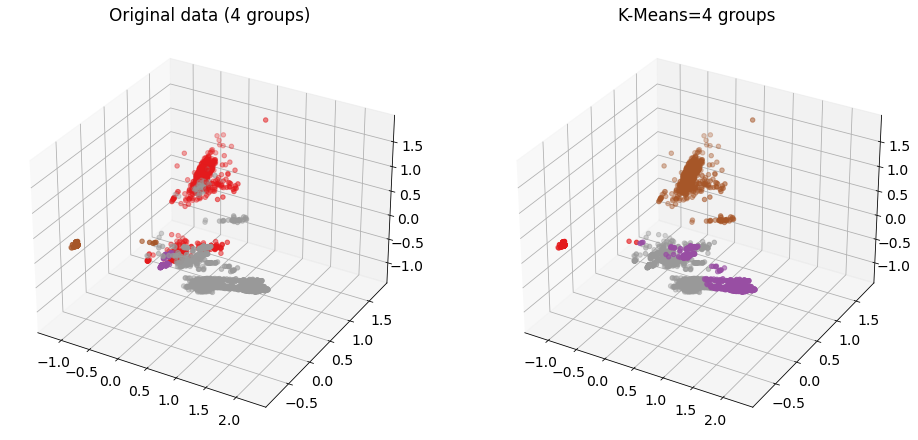

In [537]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
plt.title('Original data (4 groups)')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=cluster_y, cmap=plt.cm.Set1)
ax = fig.add_subplot(122, projection='3d')
plt.title('K-Means=4 groups')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=predict, cmap=plt.cm.Set1)
plt.show()

# Birch

In [538]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=4, threshold = 0.5, branching_factor = 20)
brc.fit(data)
predict = brc.predict(data)

In [539]:
predict

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

# Measure performance

In [540]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(cluster_y,predict))

Adjusted Mutual Information: 0.740


# Visualize data & Visualize clusters (2D)

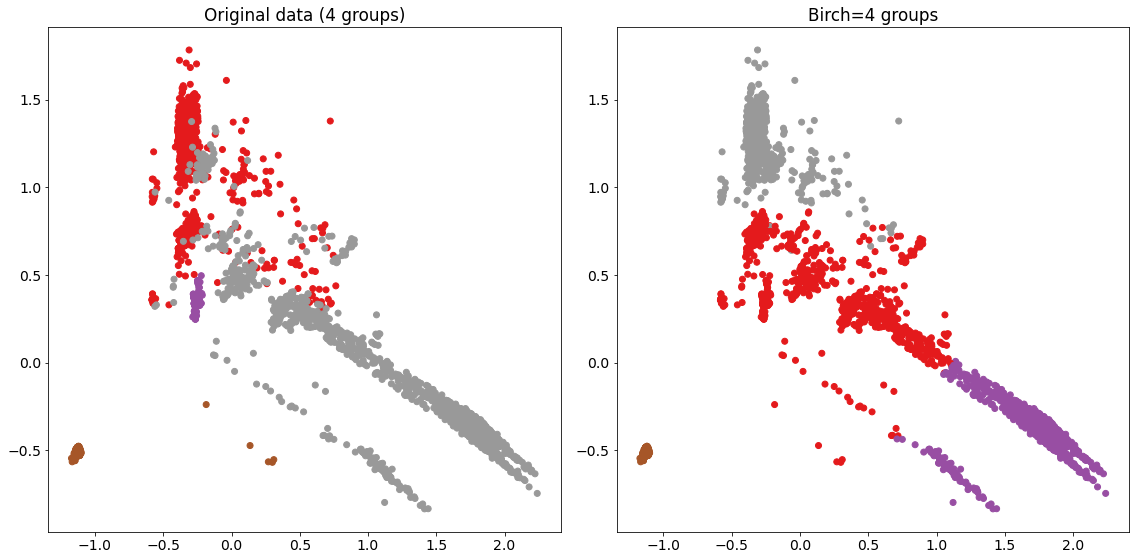

In [541]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Original data (4 groups)')
plt.scatter(data[:,0], data[:,1], c=cluster_y, cmap=plt.cm.Set1)

plt.subplot(122)
plt.title('Birch=4 groups')
plt.scatter(data[:,0], data[:,1], c=predict, cmap=plt.cm.Set1)

plt.tight_layout()
plt.show()

# Visualize data & Visualize clusters (3D)

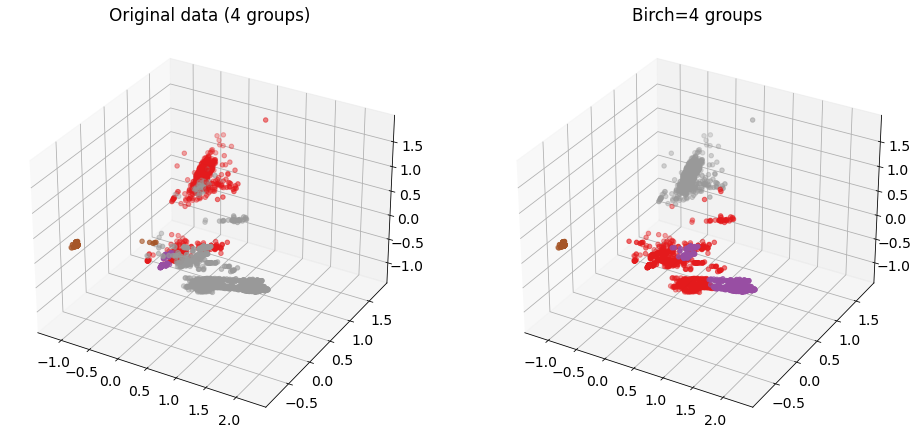

In [542]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
plt.title('Original data (4 groups)')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=cluster_y, cmap=plt.cm.Set1)
ax = fig.add_subplot(122, projection='3d')
plt.title('Birch=4 groups')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=predict, cmap=plt.cm.Set1)
plt.show()

# AgglomerativeClustering

In [543]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(data)
predict = clustering.labels_

In [544]:
predict

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

# Measure performance

In [545]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(cluster_y,predict))

Adjusted Mutual Information: 0.726


# Visualize data & Visualize clusters (2D)

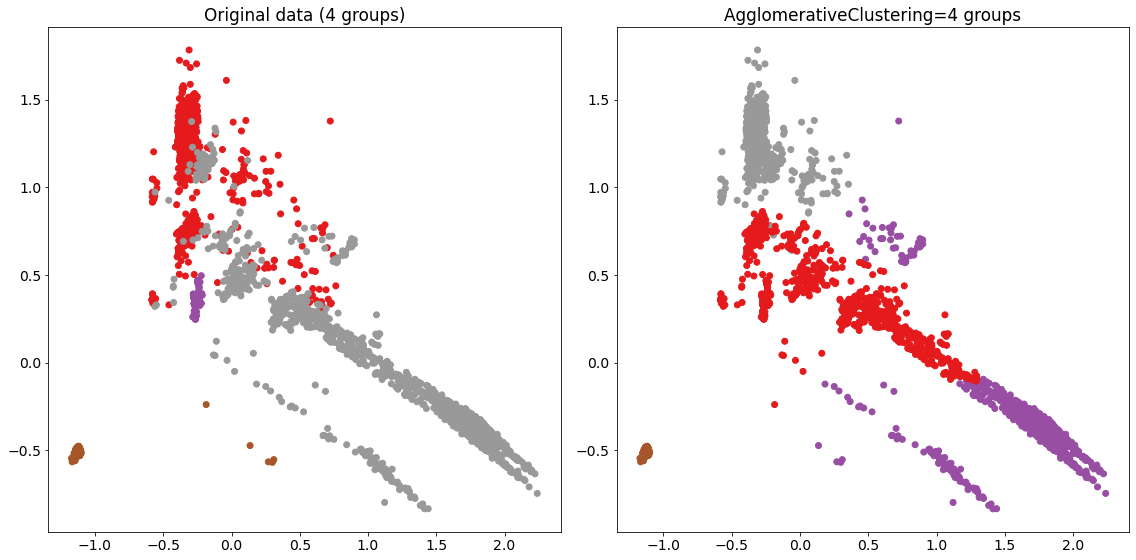

In [546]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Original data (4 groups)')
plt.scatter(data[:,0], data[:,1], c=cluster_y, cmap=plt.cm.Set1)

plt.subplot(122)
plt.title('AgglomerativeClustering=4 groups')
plt.scatter(data[:,0], data[:,1], c=predict, cmap=plt.cm.Set1)

plt.tight_layout()
plt.show()

# Visualize data & Visualize clusters (3D)

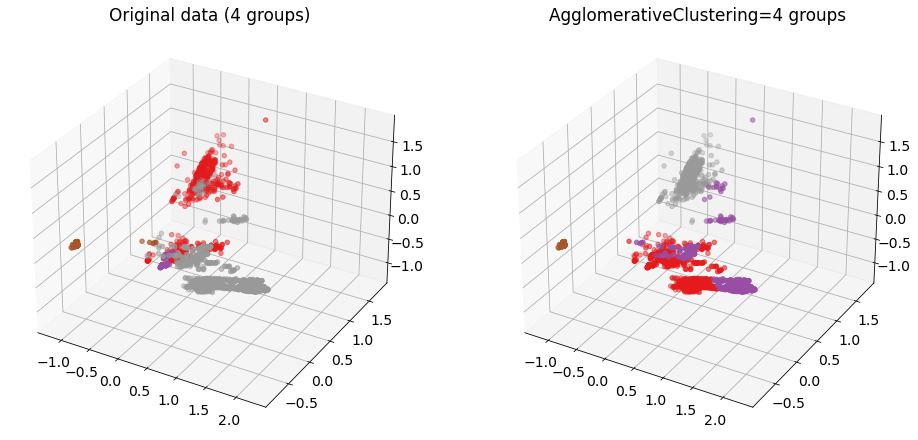

In [547]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
plt.title('Original data (4 groups)')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=cluster_y, cmap=plt.cm.Set1)
ax = fig.add_subplot(122, projection='3d')
plt.title('AgglomerativeClustering=4 groups')
ax.scatter(data[:,0], data[:,1],data[:,2] ,c=predict, cmap=plt.cm.Set1)
plt.show()